## Brain Tumor Prediction


## Business Problems and data understanding

## Objective : 
-  Develop predictive models to accurately classify brain tumor cases based on tumor-related features.
## Constraints:
- Ensure that the data for tumor-related features (Area, Perimeter, Convex Area, Solidity, Equivalent Diameter, Major Axis, Minor Axis) is accurate, reliable, and comprehensive to facilitate effective model training and evaluation.
    

 

In [52]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
#loading dataset
df = pd.read_csv("Brain-tumor-detection.csv")

In [3]:
df

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


In [4]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [6]:
df.tail()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0
240,250.0,66.769552,264.0,0.946970,17.841241,12.933073,26.319555,(1.0852923199683768e-16+1.7724168645588256j),0


In [7]:
df.shape

(241, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 241 non-null    float64
 1   Perimeter            241 non-null    float64
 2   Convex Area          241 non-null    float64
 3   Solidity             241 non-null    float64
 4   Equivalent Diameter  241 non-null    float64
 5   Major Axis           241 non-null    float64
 6   Minor Axis           241 non-null    float64
 7   Eccentricity         241 non-null    object 
 8   Class                241 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 17.1+ KB


## EDA

<Axes: xlabel='Class', ylabel='Convex Area'>

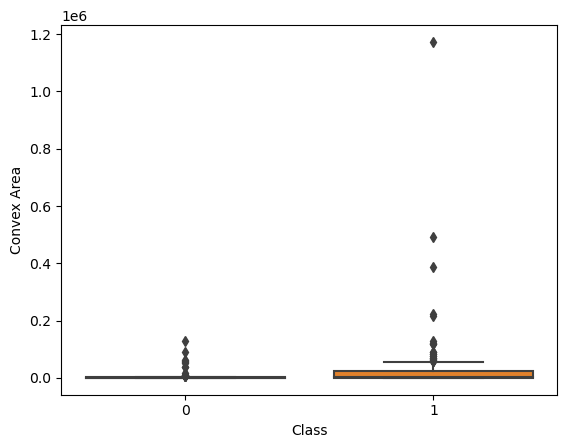

In [9]:
sns.boxplot(x="Class", y="Convex Area", data=df)

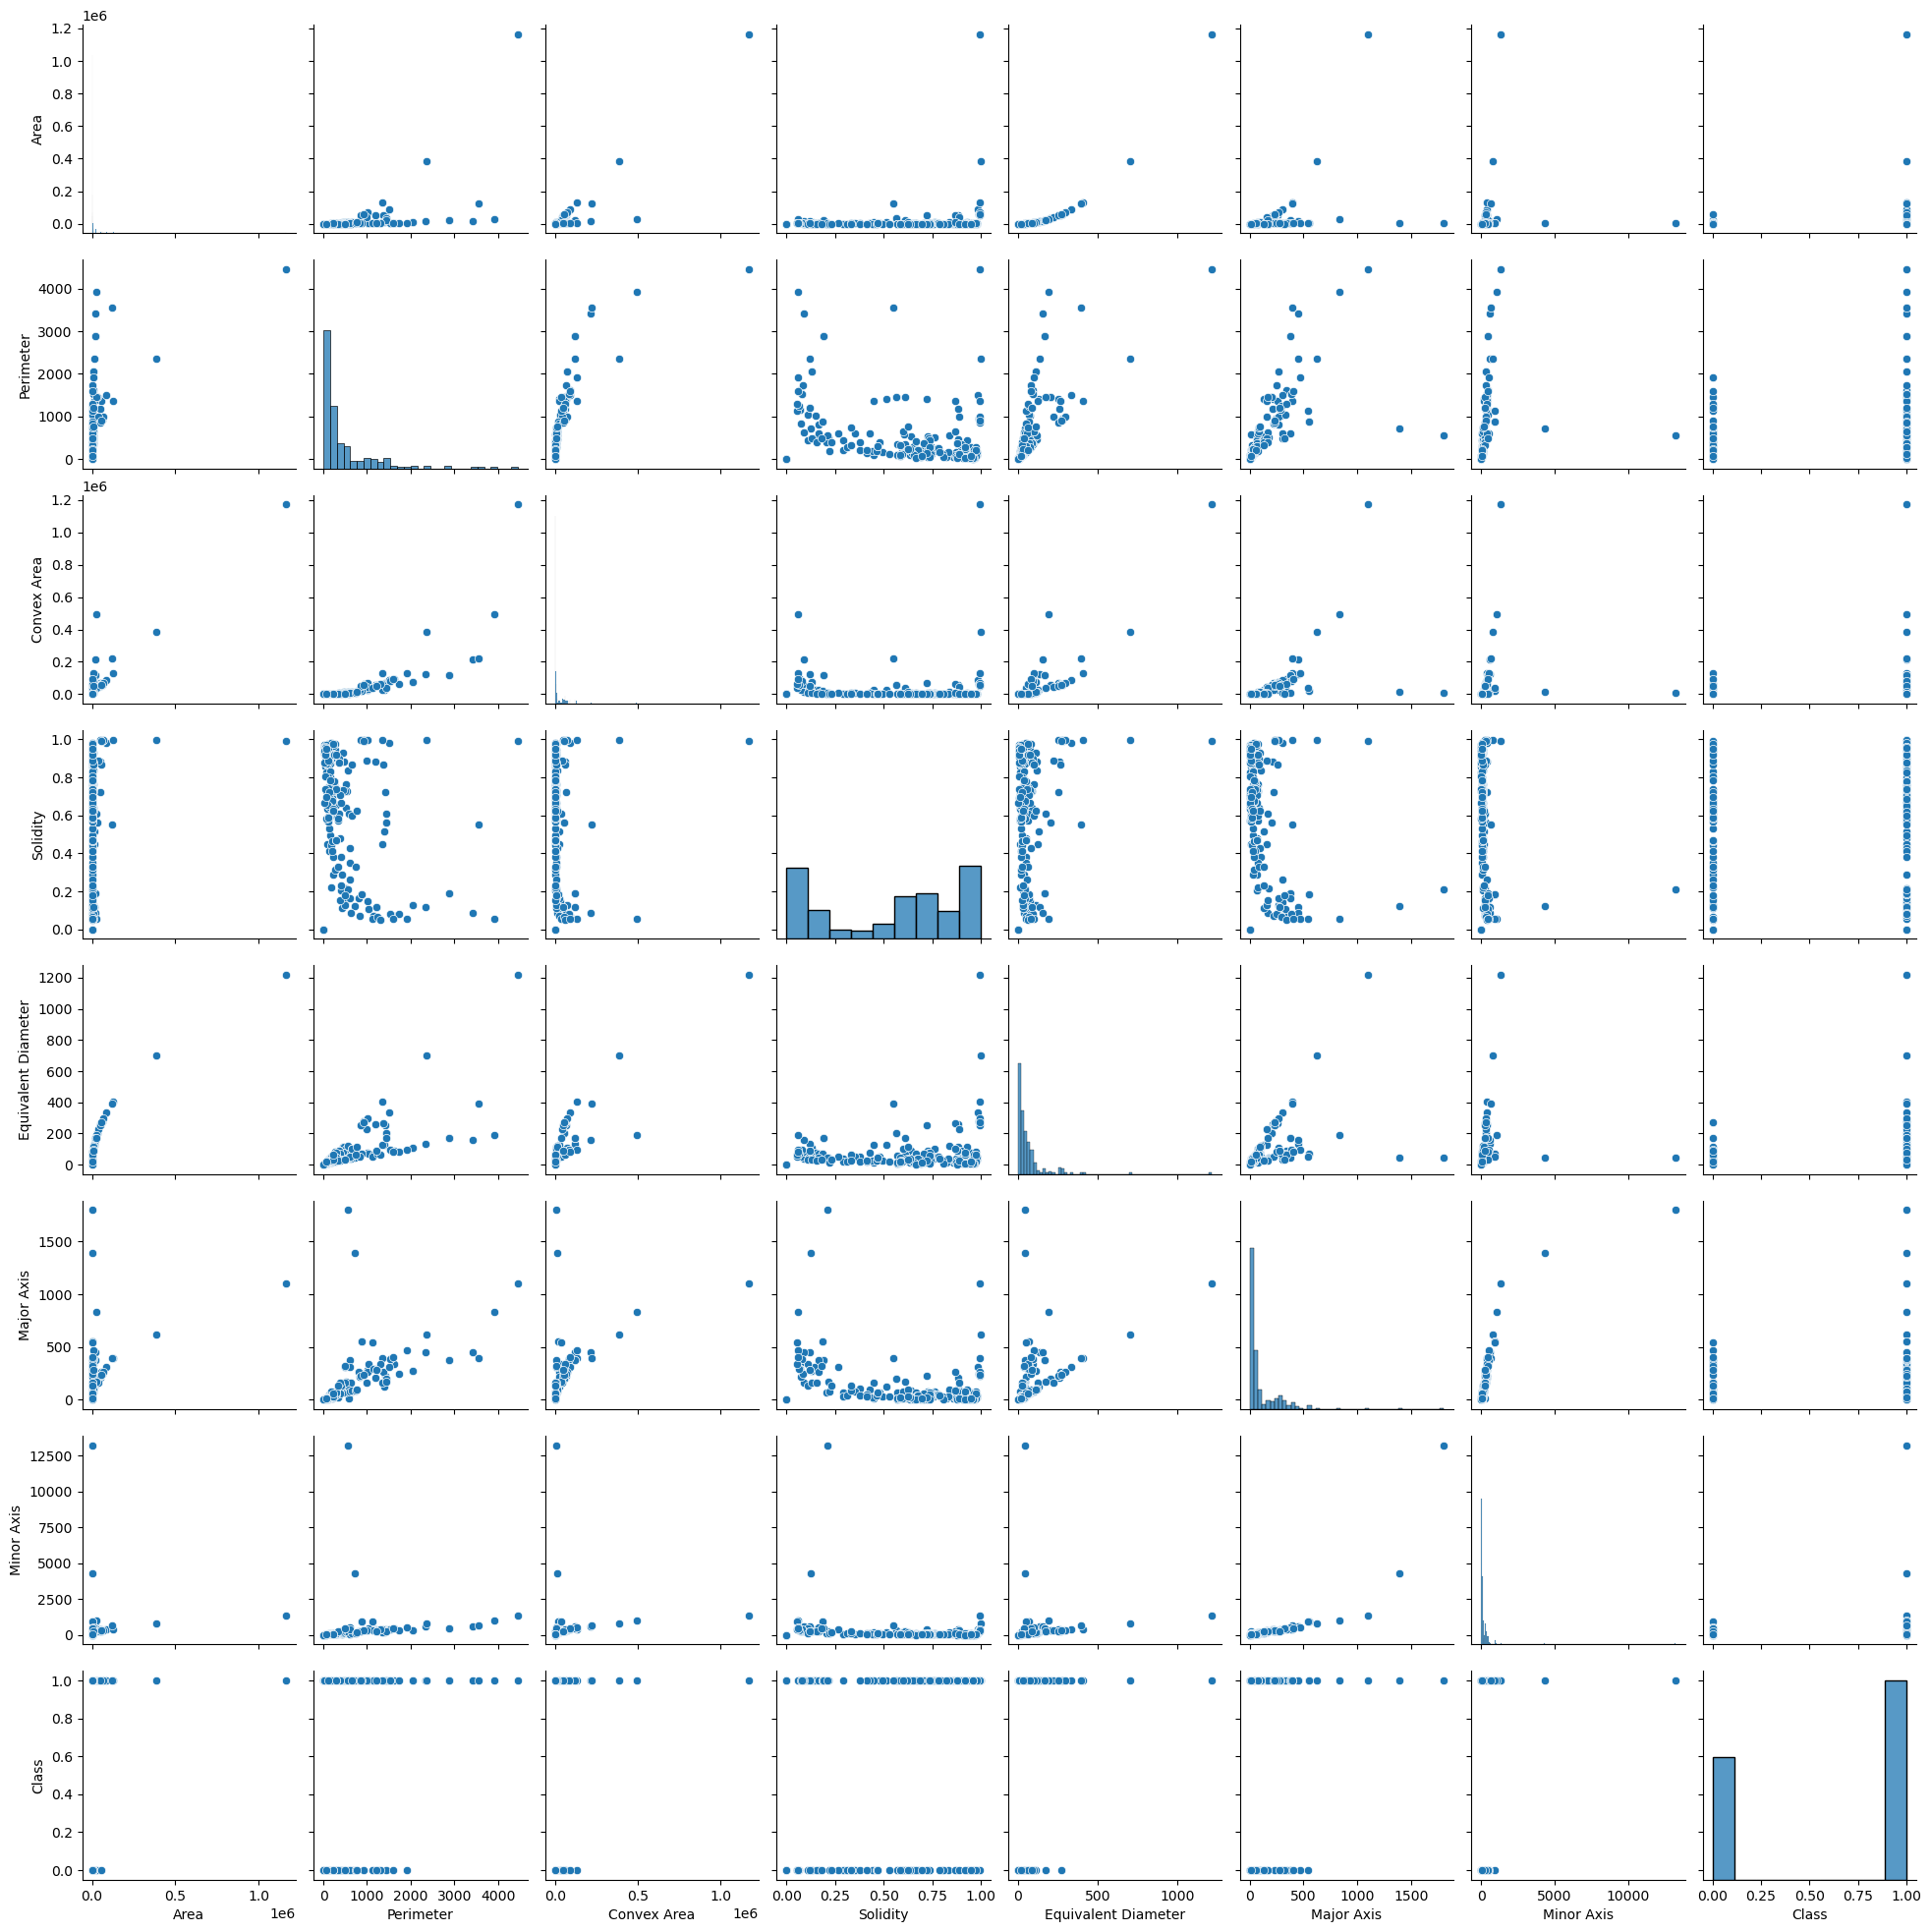

In [11]:
# Plot pair plots for all numeric columns
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

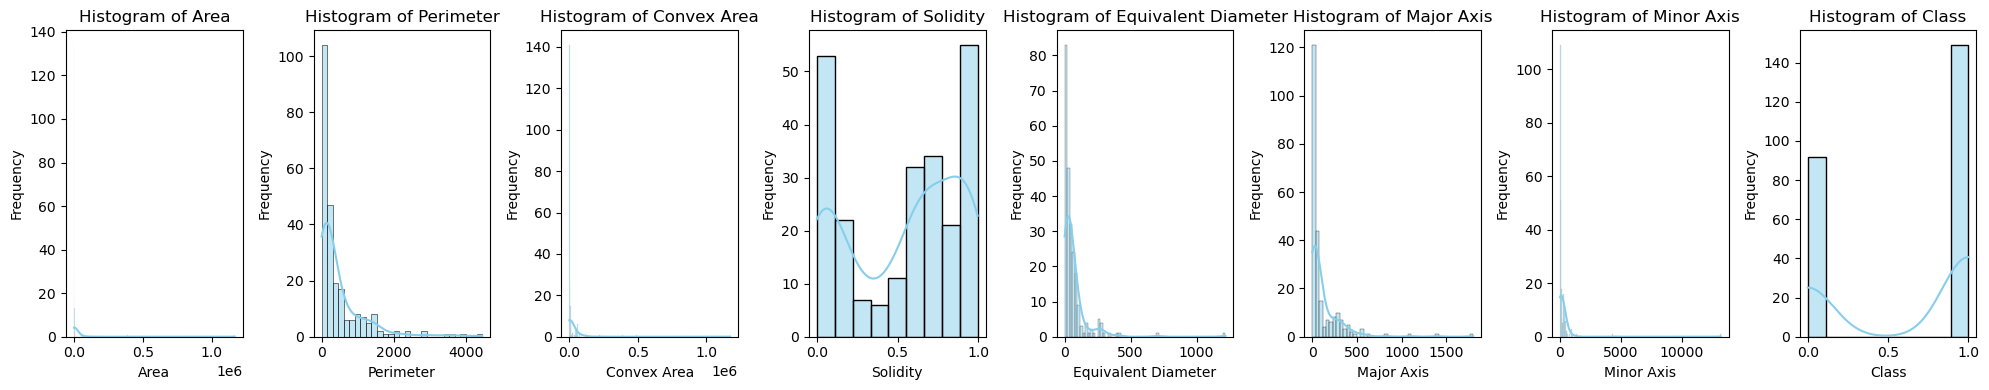

In [12]:
# Set the number of plots based on the number of numeric columns
num_plots = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Create subplots
fig, axes = plt.subplots(1, num_plots, figsize=(20, 4))

# Plot histograms for each numeric column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(df[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {column}')  # Set subplot title
    axes[i].set_xlabel(column)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label

# Hide empty subplots
for j in range(i + 1, num_plots):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



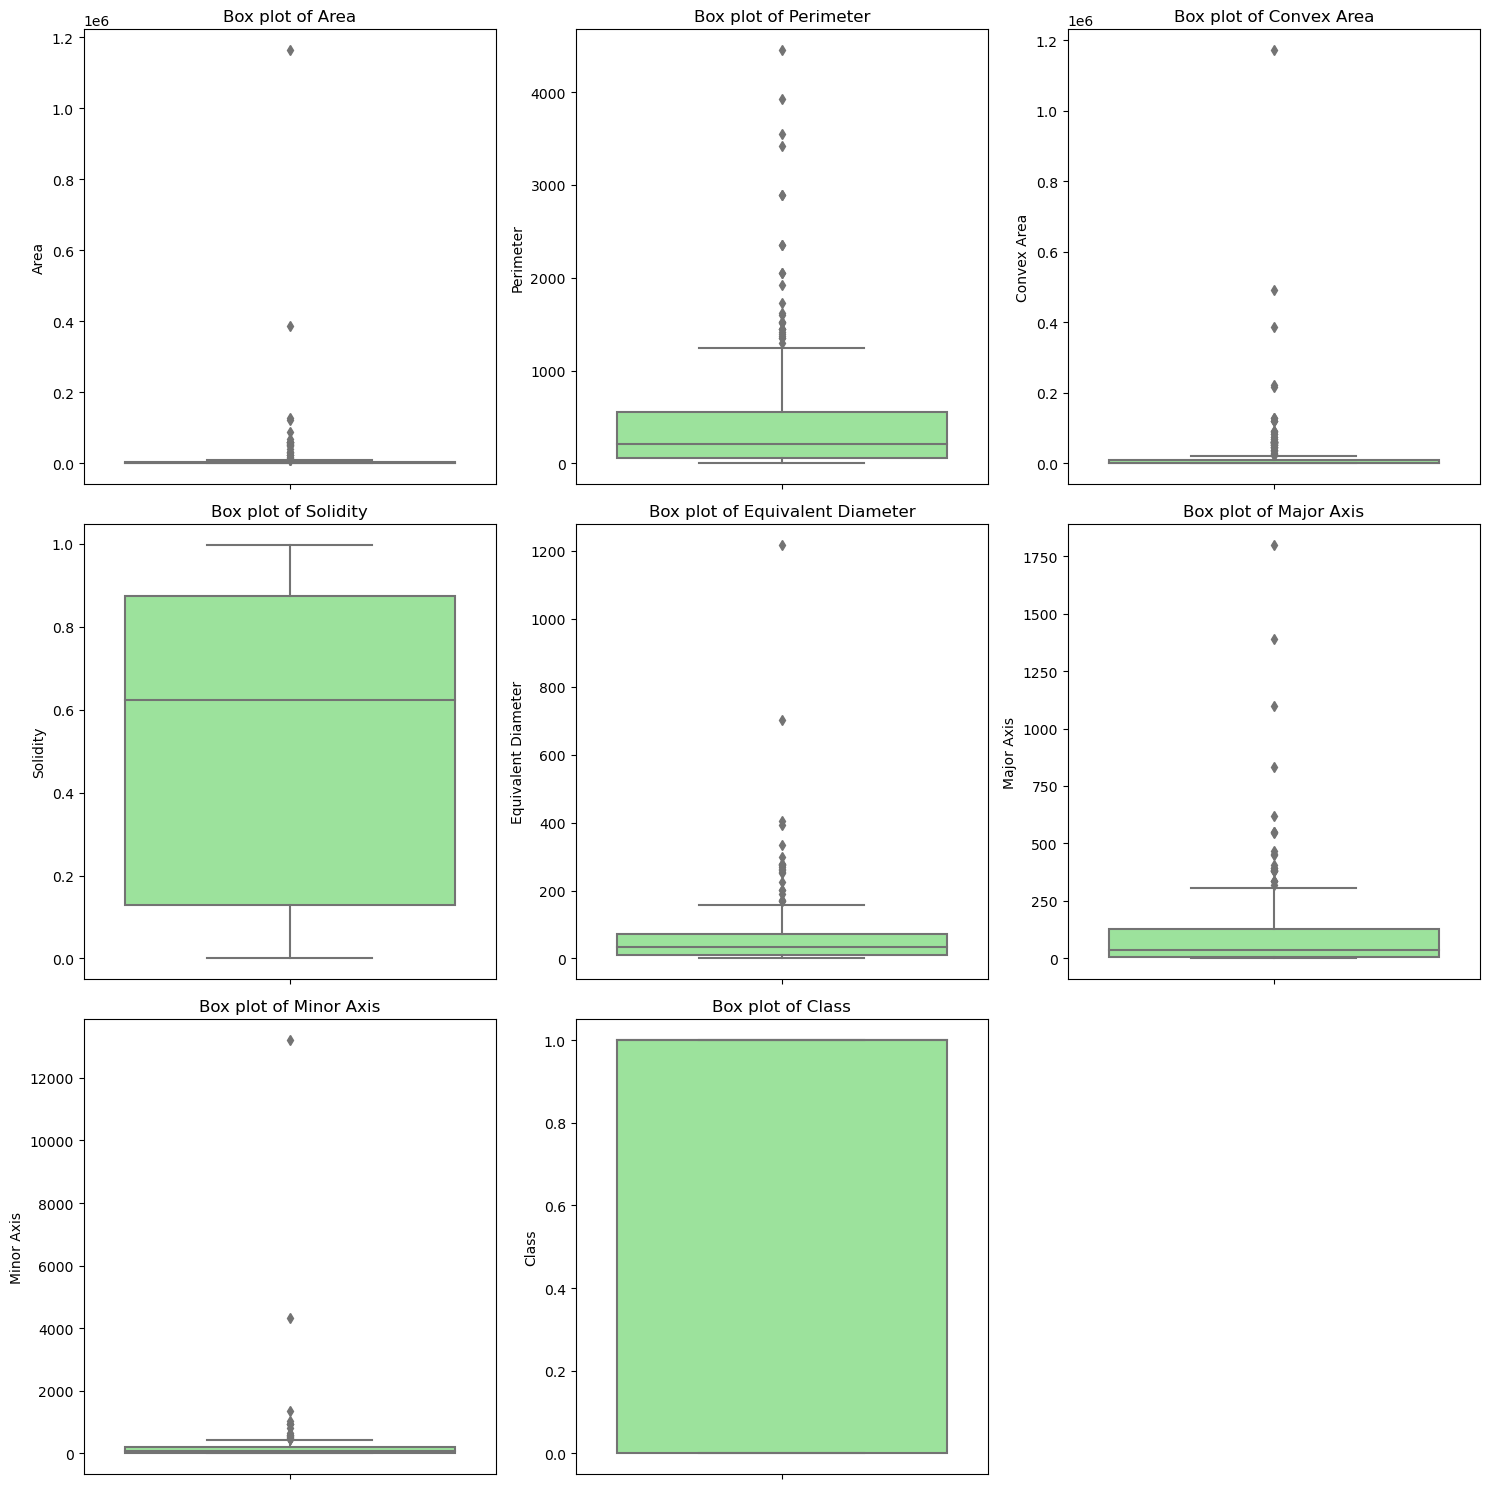

In [13]:


# Set the number of plots based on the number of numeric columns
num_plots = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Calculate the number of rows and columns for the subplots grid
num_rows = (num_plots + 2) // 3  # Adjust the number of rows as needed
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot box plots for each numeric column
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)

# Hide empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 ## Data Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 241 non-null    float64
 1   Perimeter            241 non-null    float64
 2   Convex Area          241 non-null    float64
 3   Solidity             241 non-null    float64
 4   Equivalent Diameter  241 non-null    float64
 5   Major Axis           241 non-null    float64
 6   Minor Axis           241 non-null    float64
 7   Eccentricity         241 non-null    object 
 8   Class                241 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 17.1+ KB


In [26]:
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [27]:
df.duplicated().sum()

51

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,190.0,15232.223684,90080.240616,0.0,322.750000,1284.250000,4642.750000,1.164150e+06
Perimeter,190.0,527.502377,718.352894,0.0,110.740114,249.521859,603.354900,4.453521e+03
Convex Area,190.0,26921.731579,100199.765311,0.0,473.125000,2503.500000,10379.500000,1.172680e+06
Solidity,190.0,0.627155,0.305307,0.0,0.417811,0.694451,0.901726,9.973608e-01
Equivalent Diameter,190.0,72.329617,119.321545,0.0,20.271060,40.435636,76.881499,1.217474e+03
Major Axis,190.0,127.541023,218.235508,0.0,17.834935,47.482395,158.806271,1.797921e+03
Minor Axis,190.0,250.244717,1012.400816,0.0,39.009347,77.125595,235.056065,1.321079e+04
Class,190.0,0.673684,0.470103,0.0,0.000000,1.000000,1.000000,1.000000e+00


In [31]:
def comp_eccentric(x):
    if x.isnumeric()==True:
        return abs(complex(x))
    else:
        return abs(complex(x[1:-1]))
df['Eccentricity'] = df['Eccentricity'].apply(comp_eccentric)

In [32]:
df['Eccentricity']

0      1.378312
1      1.658266
2      1.335325
3      1.030671
4      1.388168
         ...   
236    2.013375
237    1.800646
238    0.296509
239    0.206967
240    1.772417
Name: Eccentricity, Length: 190, dtype: float64

In [33]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 190 non-null    float64
 1   Perimeter            190 non-null    float64
 2   Convex Area          190 non-null    float64
 3   Solidity             190 non-null    float64
 4   Equivalent Diameter  190 non-null    float64
 5   Major Axis           190 non-null    float64
 6   Minor Axis           190 non-null    float64
 7   Eccentricity         190 non-null    float64
 8   Class                190 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 14.8 KB


<Axes: >

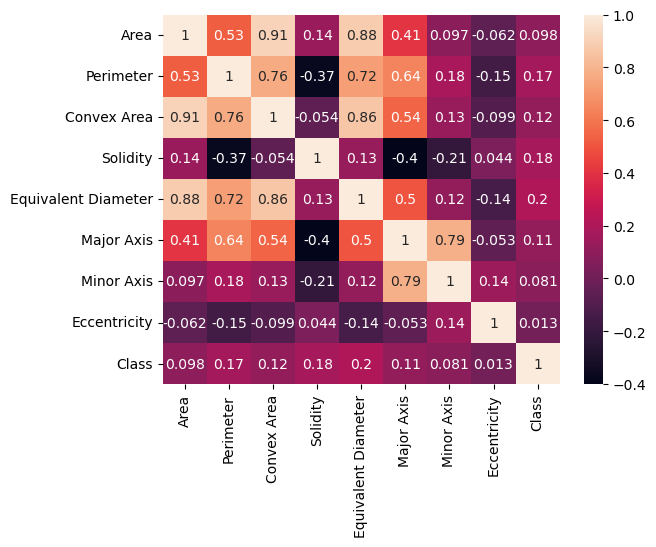

In [37]:
sns.heatmap(data=df.corr(),annot=True)

## Splitting the data

In [38]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [39]:
from feature_engine.outliers import Winsorizer #removing outliers
for i in X.columns:
    mad_win=Winsorizer(capping_method='mad',tail='both',fold=1)
    mad_win.fit(X[[i]])
    X[[i]]=mad_win.transform(X[[i]])

In [40]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.2, random_state=42)

In [43]:
sc= StandardScaler()
X_scaled = sc.fit_transform(X) # for standardising the features

In [44]:
X_train

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
55,1852.500000,293.178714,2824.500000,0.655868,48.566205,45.951042,75.614738,1.306842
36,733.500000,145.154328,920.000000,0.797283,30.560124,19.838106,56.872528,1.738590
138,2998.878831,520.036490,6042.840835,0.993388,75.566127,100.738132,153.620094,0.729937
65,307.000000,78.083260,340.000000,0.902941,19.770800,14.138240,30.886417,1.738590
204,2998.878831,520.036490,6042.840835,0.358539,64.480724,85.497292,127.483498,1.106041
...,...,...,...,...,...,...,...,...
121,2998.878831,365.161468,6042.840835,0.877417,75.566127,81.260620,101.323204,0.744808
14,1160.500000,203.580734,1674.000000,0.693250,38.439491,27.039434,69.998665,1.738590
103,331.000000,135.195958,798.500000,0.414527,20.529060,53.859791,97.700401,1.513443
228,565.500000,190.953318,1225.500000,0.461444,26.833132,43.962639,52.026615,0.632852


## Import the Model

In [57]:
from sklearn.naive_bayes import GaussianNB

## Model Training

In [60]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)


GaussianNB()

## Prediction on Test Data

In [61]:
y_pred = gnb.predict(X_test)

## Evaluating the Algorithms

In [67]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 76.32%
Precision: 85.71%
Recall: 82.76%
F1-score: 84.21%


Conclusion, the model developed for predicting Brain Tumor based on the provided dataset 
- Accuracy: The model achieves an accuracy of 76.32%, indicating that approximately 76.32% of all predictions made by the model are correct.
- Precision: With a precision of 85.71%, the GNB model demonstrates a high proportion of true positive predictions relative to all positive predictions made. This implies that when the model predicts a positive outcome, it is accurate approximately 85.71% of the time.
- Recall: The recall of 82.76% suggests that the model effectively captures approximately 82.76% of all actual positive instances in the dataset. In other words, it demonstrates a good ability to identify positive instances, minimizing false negative predictions.
- F1-score: The F1-score, calculated as 84.21%, provides a harmonic mean of precision and recall. This metric balances both precision and recall, offering a comprehensive assessment of the model's performance. An F1-score closer to 1 indicates better overall performance, considering both false positive and false negative predictions.

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 5  4]
 [ 5 24]]


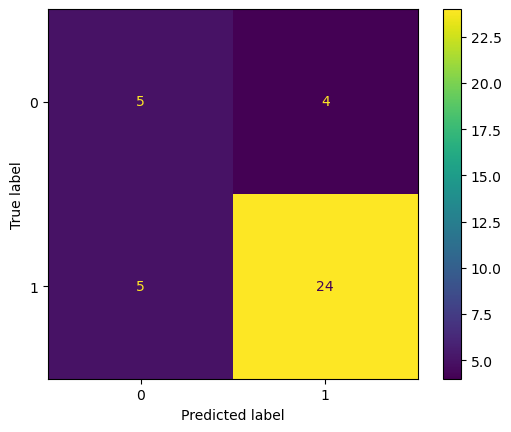

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [65]:
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.86      0.83      0.84        29

    accuracy                           0.76        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.77      0.76      0.77        38



## Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test.values)